In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Create dataframes for all the year files in world happiness report folder

In [63]:
df_2015 = pd.read_csv("world-happiness-report/2015.csv", low_memory=False)
df_2015.info()
df_2015.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Score                158 non-null    float64
 3   Happiness Rank                 158 non-null    int64  
 4   GDP per Capita                 158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom to make life choices   158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 10.0+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption)
0,Afghanistan,Southern Asia,3.575,153,0.31982,0.30335,0.23414,0.09719
1,Albania,Central and Eastern Europe,4.959,95,0.87867,0.81325,0.35733,0.06413
2,Algeria,Middle East and Northern Africa,5.605,68,0.93929,0.61766,0.28579,0.17383
3,Angola,Sub-Saharan Africa,4.033,137,0.75778,0.16683,0.10384,0.07122
4,Argentina,Latin America and Caribbean,6.574,30,1.05351,0.78723,0.44974,0.08484


In [64]:
df_2016 = pd.read_csv("world-happiness-report/2016.csv", low_memory=False)
df_2016.info()
df_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Score                157 non-null    float64
 3   Happiness Rank                 157 non-null    int64  
 4   GDP per Capita                 157 non-null    float64
 5   Health (Life Expectancy)       157 non-null    float64
 6   Freedom to make life choices   157 non-null    float64
 7   Trust (Government Corruption)  157 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.9+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption)
0,Afghanistan,Southern Asia,3.360,154,0.38227,0.17344,0.16430,0.07112
1,Albania,Central and Eastern Europe,4.655,109,0.95530,0.73007,0.31866,0.05301
2,Algeria,Middle East and Northern Africa,6.355,38,1.05266,0.61804,0.21006,0.16157
3,Angola,Sub-Saharan Africa,3.866,141,0.84731,0.04991,0.00589,0.08434
4,Argentina,Latin America and Caribbean,6.650,26,1.15137,0.69711,0.42284,0.07296


In [65]:
df_2017 = pd.read_csv("world-happiness-report/2017.csv", low_memory=False)
df_2017.info()
df_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Region                         149 non-null    object 
 2   Happiness Score                155 non-null    float64
 3   Happiness Rank                 155 non-null    int64  
 4   GDP per Capita                 155 non-null    float64
 5   Health (Life Expectancy)       155 non-null    float64
 6   Freedom to make life choices   155 non-null    float64
 7   Trust (Government Corruption)  155 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.8+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption)
0,Afghanistan,Southern Asia,3.794,141,0.401477,0.180747,0.106180,0.061158
1,Albania,Central and Eastern Europe,4.644,109,0.996193,0.731160,0.381499,0.039864
2,Algeria,Middle East and Northern Africa,5.872,53,1.091864,0.617585,0.233336,0.146096
3,Angola,Sub-Saharan Africa,3.795,140,0.858428,0.049869,0.000000,0.069720
4,Argentina,Latin America and Caribbean,6.599,24,1.185295,0.695137,0.494519,0.059740


In [66]:
df_2018 = pd.read_csv("world-happiness-report/2018.csv", low_memory=False)
df_2018.info()
df_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       156 non-null    object 
 1   Region                        151 non-null    object 
 2   Happiness Score               156 non-null    float64
 3   Happiness Rank                156 non-null    int64  
 4   GDP per Capita                156 non-null    float64
 5   Health (Life Expectancy)      156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Perceptions of corruption     155 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.9+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption
0,Afghanistan,Southern Asia,3.632,145,0.332,0.255,0.085,0.036
1,Albania,Central and Eastern Europe,4.586,112,0.916,0.790,0.419,0.032
2,Algeria,Middle East and Northern Africa,5.295,84,0.979,0.687,0.077,0.135
3,Angola,Sub-Saharan Africa,3.795,142,0.730,0.269,0.000,0.061
4,Argentina,Latin America and Caribbean,6.388,29,1.073,0.744,0.570,0.054


In [67]:
df_2019 = pd.read_csv("world-happiness-report/2019.csv", low_memory=False)
df_2019.info()
df_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       156 non-null    object 
 1   Region                        150 non-null    object 
 2   Happiness Score               156 non-null    float64
 3   Happiness Rank                156 non-null    int64  
 4   GDP per Capita                156 non-null    float64
 5   Health (Life Expectancy)      156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.9+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption
0,Afghanistan,Southern Asia,3.203,154,0.350,0.361,0.000,0.025
1,Albania,Central and Eastern Europe,4.719,107,0.947,0.874,0.383,0.027
2,Algeria,Middle East and Northern Africa,5.211,88,1.002,0.785,0.086,0.114
3,Argentina,Latin America and Caribbean,6.086,47,1.092,0.881,0.471,0.050
4,Armenia,Central and Eastern Europe,4.559,116,0.850,0.815,0.283,0.064


In [68]:
df_2020 = pd.read_csv("world-happiness-report/2020.csv", low_memory=False)
df_2020.info()
df_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       153 non-null    object 
 1   Region                        153 non-null    object 
 2   Happiness Score               153 non-null    float64
 3   Happiness Rank                153 non-null    int64  
 4   GDP per Capita                153 non-null    float64
 5   Health (Life Expectancy)      153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Perceptions of corruption     153 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.7+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption
0,Afghanistan,South Asia,2.5669,153,0.300706,52.590000,0.396573,0.933687
1,Albania,Central and Eastern Europe,4.8827,105,0.906653,68.708138,0.781994,0.896304
2,Algeria,Middle East and North Africa,5.0051,100,0.943856,65.905174,0.466611,0.735485
3,Argentina,Latin America and Caribbean,5.9747,55,1.028466,68.803802,0.831132,0.842010
4,Armenia,Commonwealth of Independent States,4.6768,116,0.808262,66.750656,0.712018,0.773545


In [69]:
df_2021 = pd.read_csv("world-happiness-report/2021.csv", low_memory=False)
df_2021.info()
df_2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       149 non-null    object 
 1   Region                        149 non-null    object 
 2   Happiness Score               149 non-null    float64
 3   Happiness Rank                149 non-null    int64  
 4   GDP per Capita                149 non-null    float64
 5   Health (Life Expectancy)      149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Perceptions of corruption     149 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.4+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption
0,Afghanistan,South Asia,2.523,149,0.370,52.493,0.382,0.924
1,Albania,Central and Eastern Europe,5.117,93,1.008,68.999,0.785,0.901
2,Algeria,Middle East and North Africa,4.887,109,0.946,66.005,0.480,0.752
3,Argentina,Latin America and Caribbean,5.929,57,1.162,69.000,0.828,0.834
4,Armenia,Commonwealth of Independent States,5.283,86,0.996,67.055,0.825,0.629


In [70]:
df_2015 = df_2015.assign(Year=2015)
df_2016 = df_2016.assign(Year=2016)
df_2017 = df_2017.assign(Year=2017)
df_2018 = df_2018.assign(Year=2018)
df_2019 = df_2019.assign(Year=2019)
df_2020 = df_2020.assign(Year=2020)
df_2021 = df_2021.assign(Year=2021)

In [71]:
dfs = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]
df = pd.concat(dfs, ignore_index=True)

In [73]:
df.info()
integrated_data = df.to_csv("world-happiness-report/integrated_report.csv", index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1084 non-null   object 
 1   Region                         1067 non-null   object 
 2   Happiness Score                1084 non-null   float64
 3   Happiness Rank                 1084 non-null   int64  
 4   GDP per Capita                 1084 non-null   float64
 5   Health (Life Expectancy)       1084 non-null   float64
 6   Freedom to make life choices   1084 non-null   float64
 7   Trust (Government Corruption)  470 non-null    float64
 8   Year                           1084 non-null   int64  
 9   Perceptions of corruption      613 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 84.8+ KB


In [74]:
df.head()

,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption),Year,Perceptions of corruption
0,Afghanistan,Southern Asia,3.575,153,0.31982,0.30335,0.23414,0.09719,2015,NaN
1,Albania,Central and Eastern Europe,4.959,95,0.87867,0.81325,0.35733,0.06413,2015,NaN
2,Algeria,Middle East and Northern Africa,5.605,68,0.93929,0.61766,0.28579,0.17383,2015,NaN
3,Angola,Sub-Saharan Africa,4.033,137,0.75778,0.16683,0.10384,0.07122,2015,NaN
4,Argentina,Latin America and Caribbean,6.574,30,1.05351,0.78723,0.44974,0.08484,2015,NaN


In [75]:
df.tail()

,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption),Year,Perceptions of corruption
1079,Venezuela,Latin America and Caribbean,4.892,107,0.852,66.700,0.615,NaN,2021,0.827
1080,Vietnam,Southeast Asia,5.411,79,0.817,68.034,0.940,NaN,2021,0.796
1081,Yemen,Middle East and North Africa,3.658,141,0.329,57.122,0.602,NaN,2021,0.800
1082,Zambia,Sub-Saharan Africa,4.073,137,0.528,55.809,0.782,NaN,2021,0.823
1083,Zimbabwe,Sub-Saharan Africa,3.145,148,0.457,56.201,0.677,NaN,2021,0.821


In [76]:
dataset_mexico = df[df["Country"] == "Mexico"]

In [77]:
dataset_mexico.sort_values(by="Year", ascending=False).head(8)

,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption),Year,Perceptions of corruption
1022,Mexico,Latin America and Caribbean,6.317,36,1.126000,68.597000,0.862000,NaN,2021,0.799000
872,Mexico,Latin America and Caribbean,6.465,24,1.024387,68.299026,0.858709,NaN,2020,0.806822
715,Mexico,Latin America and Caribbean,6.595,23,1.070000,0.861000,0.433000,NaN,2019,0.073000
560,Mexico,Latin America and Caribbean,6.488,24,1.038000,0.761000,0.479000,NaN,2018,0.095000
404,Mexico,Latin America and Caribbean,6.578,25,1.153184,0.709979,0.412730,0.132774,2017,NaN
247,Mexico,Latin America and Caribbean,6.778,21,1.115080,0.711430,0.377090,0.183550,2016,NaN
91,Mexico,Latin America and Caribbean,7.187,14,1.020540,0.814440,0.481810,0.213120,2015,NaN


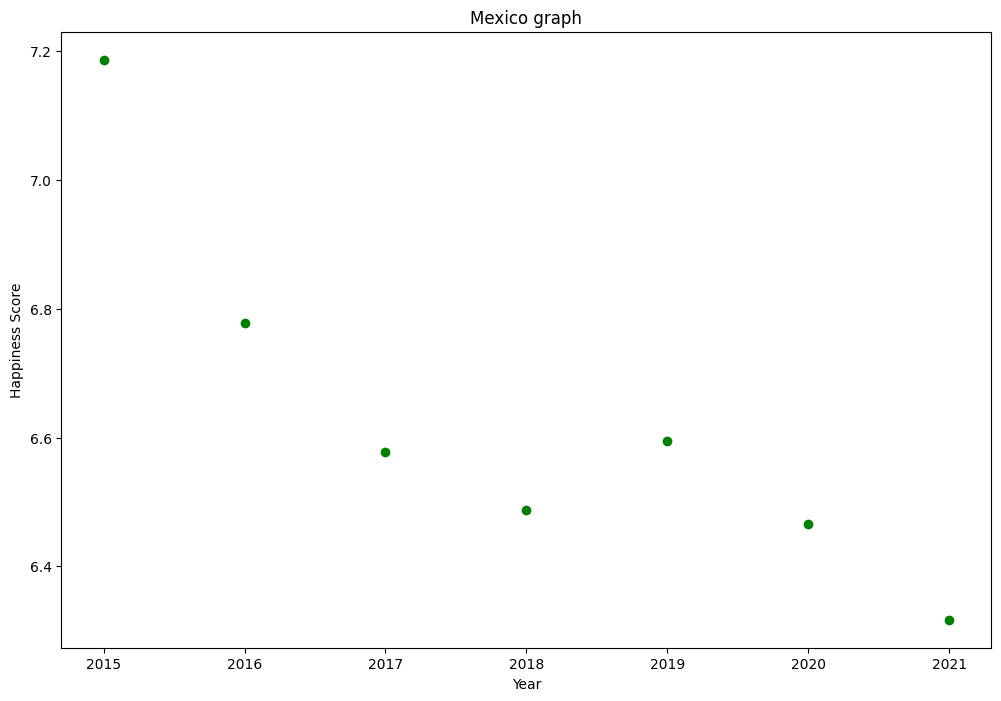

In [78]:
plt.figure(figsize=(12, 8))
plt.title("Mexico graph")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

plt.scatter(
    dataset_mexico["Year"].astype(int),
    dataset_mexico["Happiness Score"],
    marker='o',
    color="green",
)
plt.xticks(dataset_mexico["Year"], dataset_mexico["Year"])
plt.show()

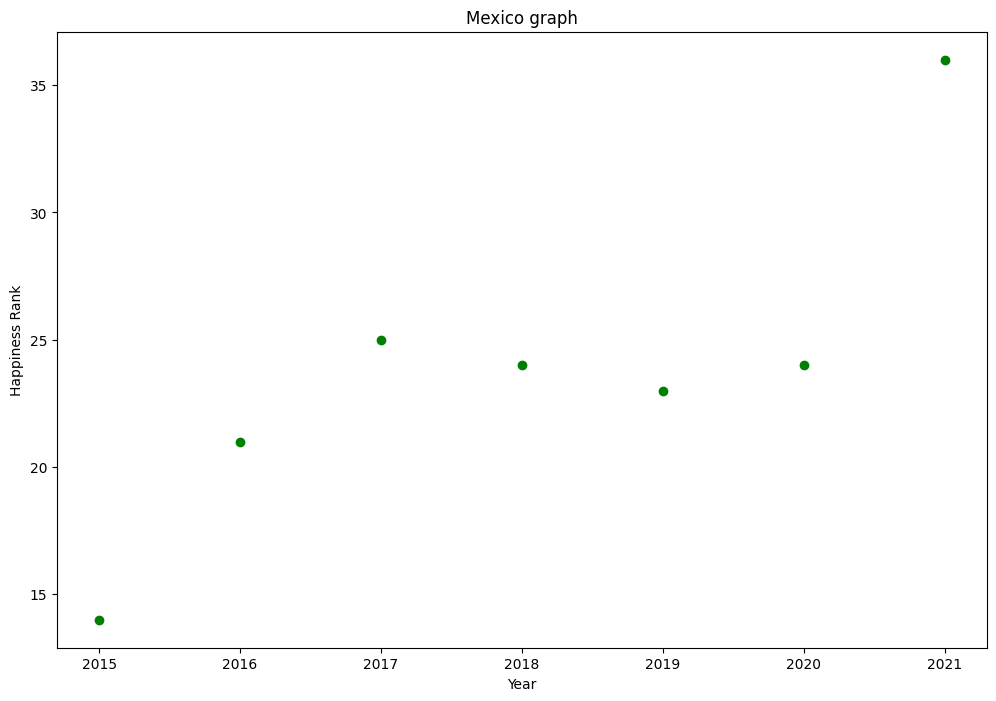

In [79]:
plt.figure(figsize=(12, 8))
plt.title("Mexico graph")
plt.xlabel("Year")
plt.ylabel("Happiness Rank")

plt.scatter(
    dataset_mexico["Year"].astype(int),
    dataset_mexico["Happiness Rank"],
    marker='o',
    color="green",
)
plt.xticks(dataset_mexico["Year"], dataset_mexico["Year"])
plt.show()

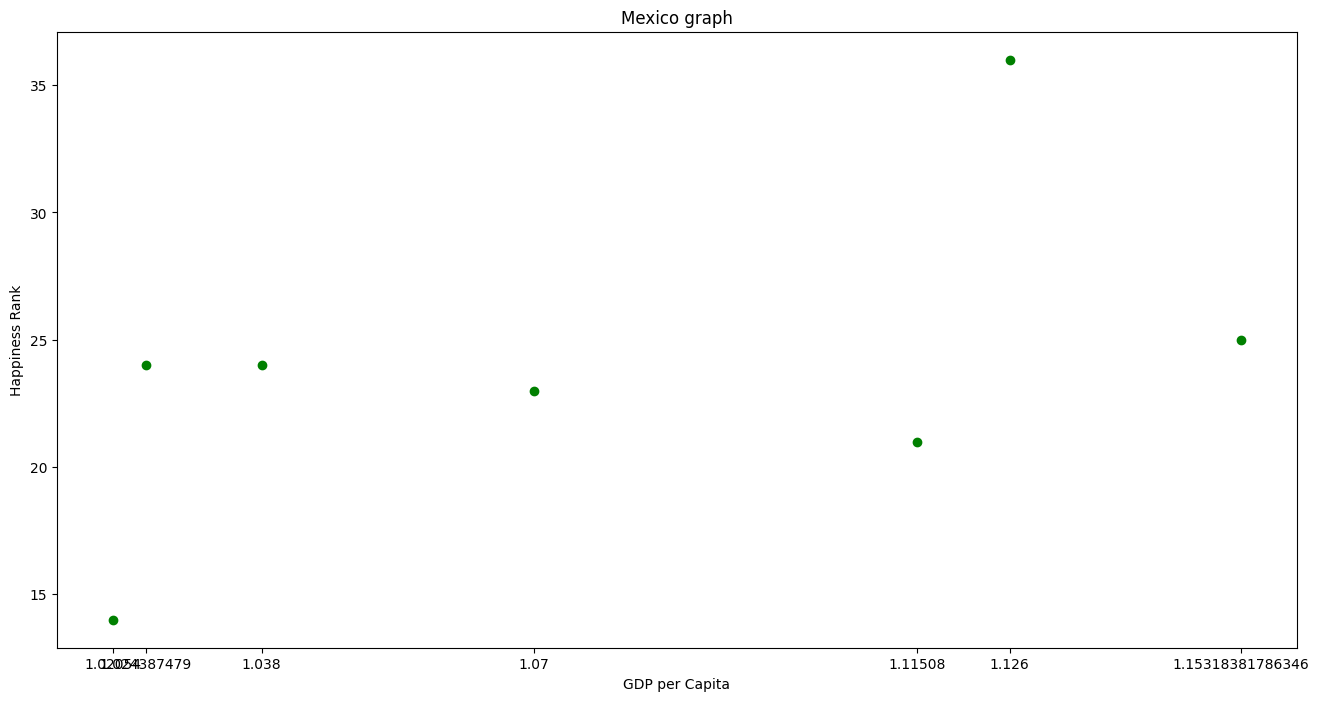

In [82]:
plt.figure(figsize=(16, 8))
plt.title("Mexico graph")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Rank")

plt.scatter(
    dataset_mexico["GDP per Capita"],
    dataset_mexico["Happiness Rank"],
    marker='o',
    color="green",
)
plt.xticks(dataset_mexico["GDP per Capita"], dataset_mexico["GDP per Capita"])
plt.show()